In [1]:
from pathlib import Path
import logging

import pandas as pd

from plate_planner.plate import QCPlate, Plate
from plate_planner.study import Study
from plate_planner.logger import logger

from pathlib import Path

logger.setLevel(logging.DEBUG)

In [2]:
fake_samples_csv_file = Path("../data/fake_case_control_Npairs_523_Ngroups_5.csv")

samples_df = pd.read_csv(fake_samples_csv_file)

samples_df

Unnamed: 0  pair_ID  specimen_ID   object date_of_birth   barcode  \
0              0        0          888  Control    1993-12-13  95388762   
1              1        0          889     Case    1993-12-13  66794295   
2              2        1          962  Control    2006-06-22  69215322   
3              3        1          963     Case    2006-06-22  77642424   
4              4        2          261  Control    1999-05-06  30225664   
...          ...      ...          ...      ...           ...       ...   
1041        1041      520           66     Case    1991-08-29    772655   
1042        1042      521          558  Control    1993-03-21  49757491   
1043        1043      521          559     Case    1993-03-24  46022059   
1044        1044      522          710  Control    2002-03-23  73437017   
1045        1045      522          711     Case    2002-03-29  43710652   

               organ  
0     Parotid glands  
1     Parotid glands  
2            Tendons  
3            Tendons  
4     Parotid glands  
...              ...  
1041  Mammary glands  
1042  Parotid glands  
1043  Parotid glands  
1044  Mammary glands  
1045  Mammary glands  

[1046 rows x 7 columns]

In [3]:
study = Study("fake_study")
study.load_specimen_records(fake_samples_csv_file)

[   DEBUG] --- Loading records file: ../data/fake_case_control_Npairs_523_Ngroups_5.csv
[   DEBUG] --- Importing csv file.
[   DEBUG] --- Looking for group index of study pairs in the following table columns:
[   DEBUG] --- 		Unnamed: 0
[   DEBUG] --- 		pair_ID
[    INFO] --- Found group index in column pair_ID
[   DEBUG] --- 1046 specimens in file
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [4]:
qc_sample_pattern = Path("../data/plate_config_dynamic.toml")
qc_plate = QCPlate(QC_config=qc_sample_pattern)

study.distribute_samples_to_plates(qc_plate)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../data/plate_config_dynamic.toml
[   DEBUG] --- {'QC': {'start_with_QC_round': True, 'run_QC_after_n_specimens': 11, 'names': {'EC': 'EC: External_Control_(matrix)', 'PB': 'PB: Paper_Blank', 'PO': 'PO: Pooled_specimens'}, 'patterns': {'then_alternating': [['EC', 'PB'], ['EC', 'PO']]}}}
[    INFO] --- Creating dynamic plate layout with QC samples.
[   DEBUG] --- Setting up dynamic QC scheme from config file
[   DEBUG] --- Round 1: ['EC', 'PB']
[   DEBUG] --- Round 2: ['EC', 'PO']
[   DEBUG] --- Round 3: ['EC', 'PB']
[   DEBUG] --- Round 4: ['EC', 'PO']
[   DEBUG] --- Round 5: ['EC', 'PB']
[   DEBUG] --- Round 6: ['EC', 'PO']
[   DEBUG] --- Round 7: ['EC', 'PB']
[   DEBUG] --- Round 8: ['EC', 'PO']
[   DEBUG] --- Well A1: {'QC': True, 'sample_code': 'EC', 'sample_type': 'EC: External_Control_(matrix)', 'sample_name': 'EC1'}
[   DEBUG] --- Well A2: {'QC': True, 'sample_code': 'PB', 'sample_t

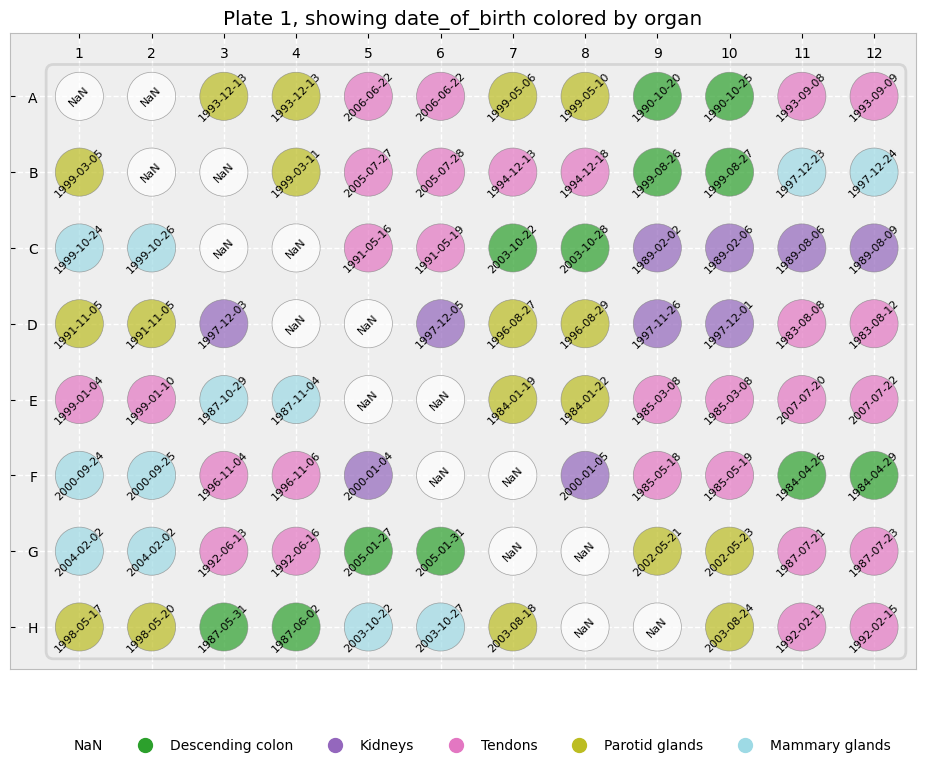

In [5]:
fig = study[0].as_figure(color_metadata_key="organ", annotation_metadata_key="date_of_birth", rotation=45)